In [249]:
df = pd.read_csv('C:/Users/smail/Downloads/iot-tweets-2009-2016-complet/iot-tweets-2009-2016-complet.tsv', sep='\t',header=None)
df.iloc[my_df[my_df.isnull().any(axis=1)].index,:].head()

C:\Users\smail\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4,5,6,7
108,1206451833,neutral,4,us,andy,http://tinyurl.com/bhny4k,"'5 Companies Building the ""Internet of Things""...",18062945
188,1208307861,neutral,4,us,male,http://ff.im/-12Z3N,"'5 Companies Building the ""Internet of Things""...",13430492
192,1208404708,neutral,4,ca,male,http://tinyurl.com/c73vf8,'RT @kickerstudio: Five companies building the...,9800962
212,1210947584,neutral,None,ca,andy,http://st.tl/SW88y),'RT @Wuxia Added to a feed: The Internet of Th...,15017506
240,1212949472,neutral,4,br,male,http://bit.ly/TzIkN,"'5 Companies Building the ""Internet of Things""...",15050510


In [250]:
my_df.dropna(inplace=True)
my_df.reset_index(drop=True,inplace=True)
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85059 entries, 0 to 85058
Data columns (total 3 columns):
text         85059 non-null object
sentiment    85059 non-null object
TweetID      85059 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.9+ MB


In [251]:
my_df['sentiment'].value_counts()

neutral     83224
negative      918
positive      917
Name: sentiment, dtype: int64

In [252]:
!pip install WordCloud

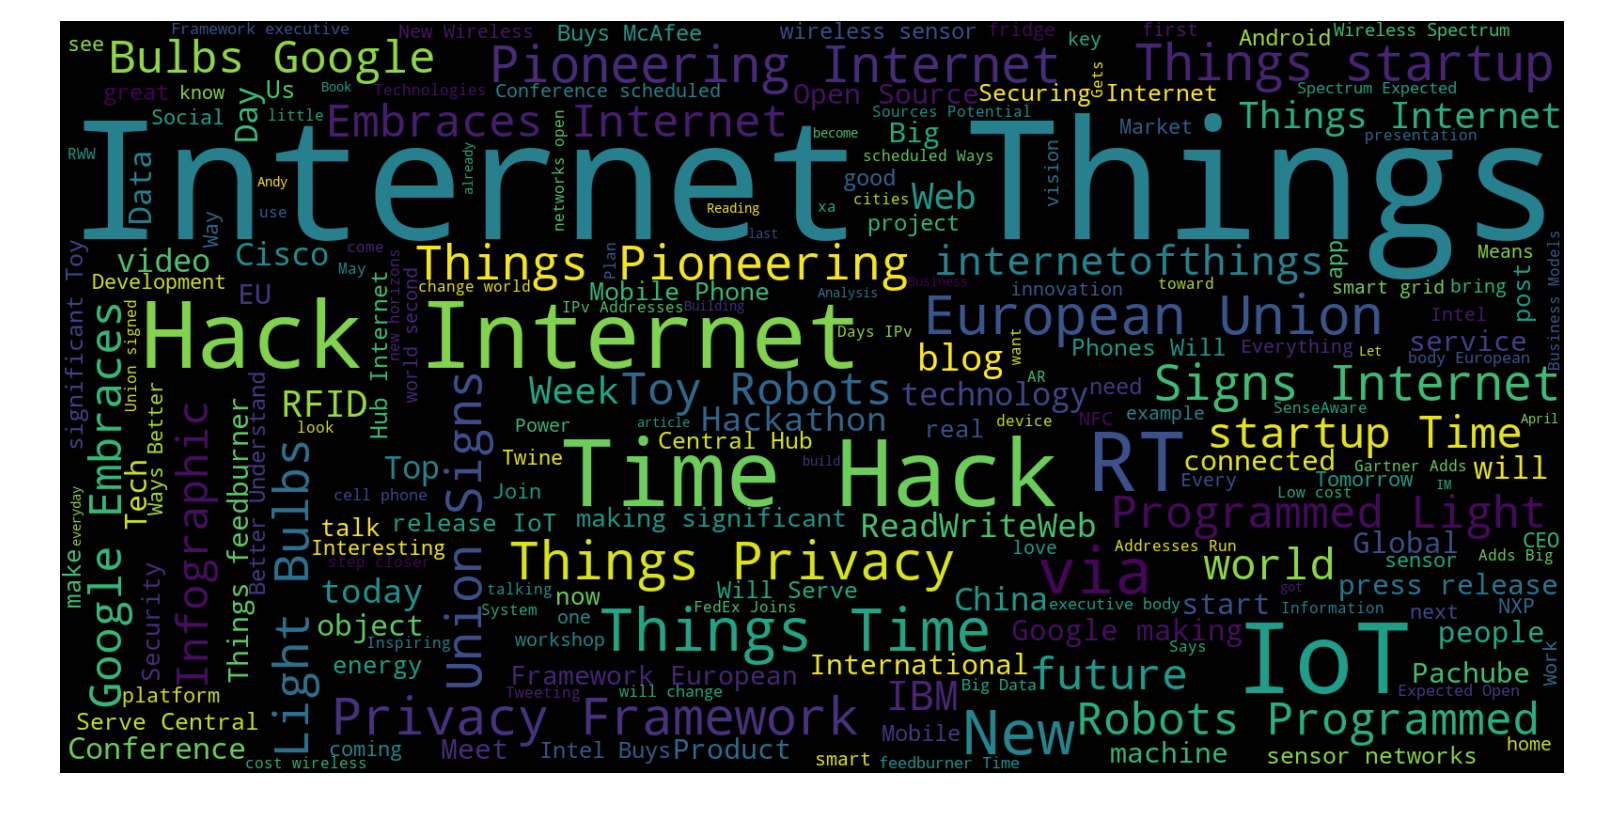

In [253]:
neg_tweets = my_df[my_df['sentiment'] == 'negative']
neg_string = []
for t in neg_tweets.text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

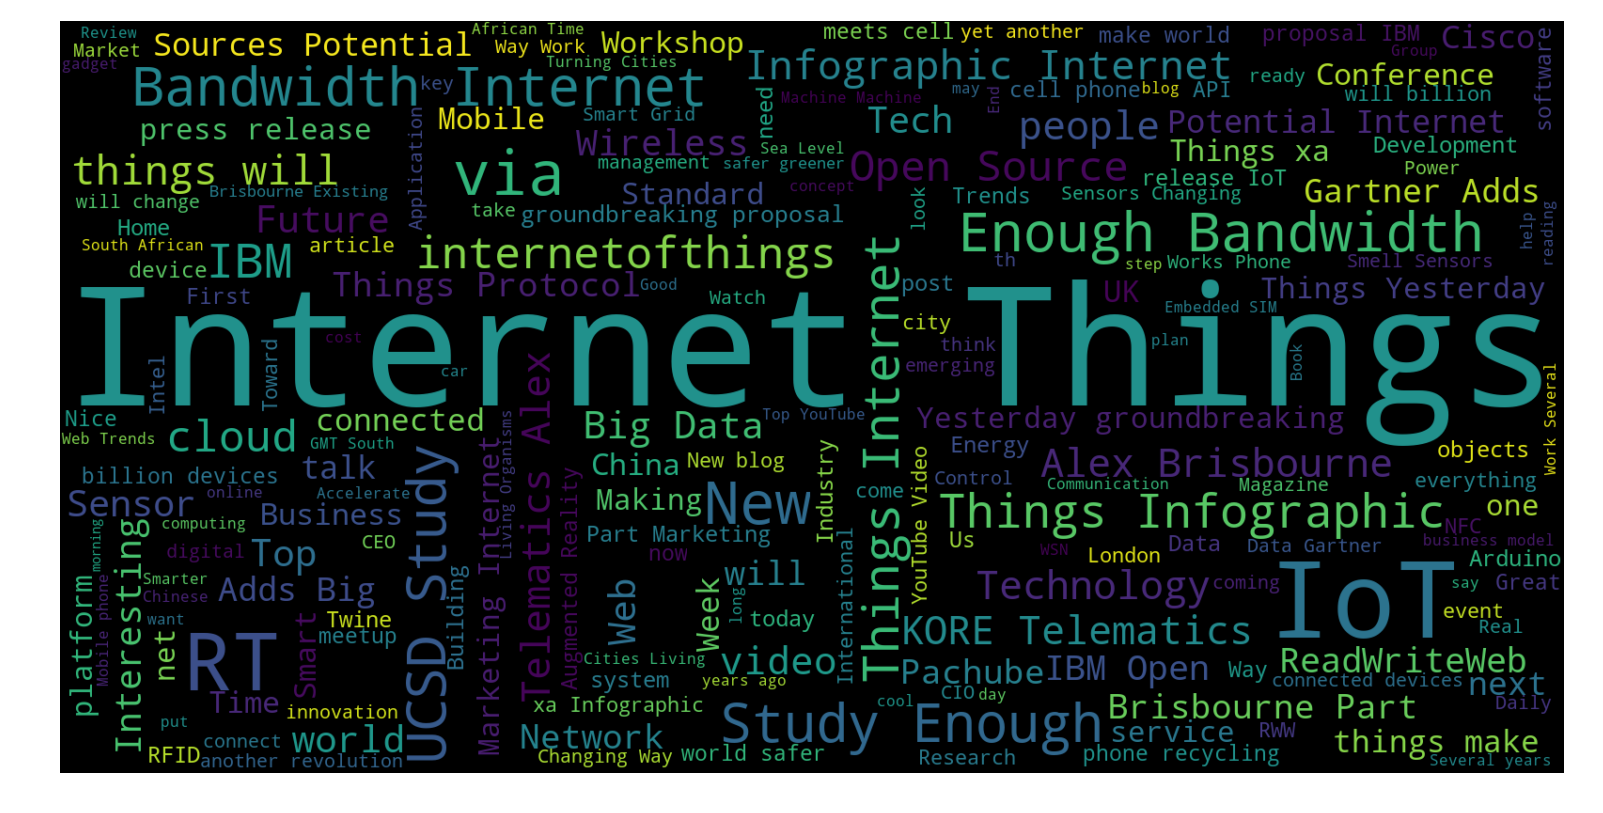

In [254]:
pos_tweets = my_df[my_df['sentiment'] == 'positive']
pos_string = []
for t in pos_tweets.text:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [255]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(my_df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [256]:
neg_doc_matrix = cvec.transform(my_df[my_df.sentiment == 'negative'].text)
pos_doc_matrix = cvec.transform(my_df[my_df.sentiment == 'positive'].text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()

In [257]:
document_matrix = cvec.transform(my_df.text)
#my_df.head(950)

In [258]:
document_matrix

<85059x24697 sparse matrix of type '<class 'numpy.int64'>'
	with 869893 stored elements in Compressed Sparse Row format>

In [259]:
%%time
neg_batches = np.linspace(0,1000,100).astype(int)
i=0
neg_tf = []
while i < len(neg_batches)-1:
    batch_result = np.sum(document_matrix[neg_batches[i]:neg_batches[i+1]].toarray(),axis=0)
    neg_tf.append(batch_result)
    if (i % 10 == 0) | (i == len(neg_batches)-2):
        print(neg_batches[i+1],"entries' term freuquency calculated")
    i += 1

10 entries' term freuquency calculated
111 entries' term freuquency calculated
212 entries' term freuquency calculated
313 entries' term freuquency calculated
414 entries' term freuquency calculated
515 entries' term freuquency calculated
616 entries' term freuquency calculated
717 entries' term freuquency calculated
818 entries' term freuquency calculated
919 entries' term freuquency calculated
1000 entries' term freuquency calculated
Wall time: 1.3 s
Parser   : 286 ms


In [124]:
#my_df.tail()

In [260]:
%%time
pos_batches = np.linspace(0,1000,100).astype(int)
i=0
pos_tf = []
while i < len(pos_batches)-1:
    batch_result = np.sum(document_matrix[pos_batches[i]:pos_batches[i+1]].toarray(),axis=0)
    pos_tf.append(batch_result)
    if (i % 10 == 0) | (i == len(pos_batches)-2):
        print(pos_batches[i+1],"entries' term freuquency calculated")
    i += 1

10 entries' term freuquency calculated
111 entries' term freuquency calculated
212 entries' term freuquency calculated
313 entries' term freuquency calculated
414 entries' term freuquency calculated
515 entries' term freuquency calculated
616 entries' term freuquency calculated
717 entries' term freuquency calculated
818 entries' term freuquency calculated
919 entries' term freuquency calculated
1000 entries' term freuquency calculated
Wall time: 869 ms


In [262]:
neg = np.sum(neg_tf,axis=0)
pos = np.sum(pos_tf,axis=0)
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df.head(100)

,0,1
aa,0,0
aaaaallll,0,0
aaaand,0,0
aaah,0,0
aaahahahaa,0,0
aaas,0,0
aagh,0,0
aal,0,0
aalborg,0,0
aam,0,0


In [263]:
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
of,1087,1087,2174
internet,944,944,1888
things,923,923,1846
the,827,827,1654
to,183,183,366
building,150,150,300
for,150,150,300
is,145,145,290
companies,139,139,278
rt,134,134,268


Text(0.5, 1.0, 'Top 200 tokens in tweets')

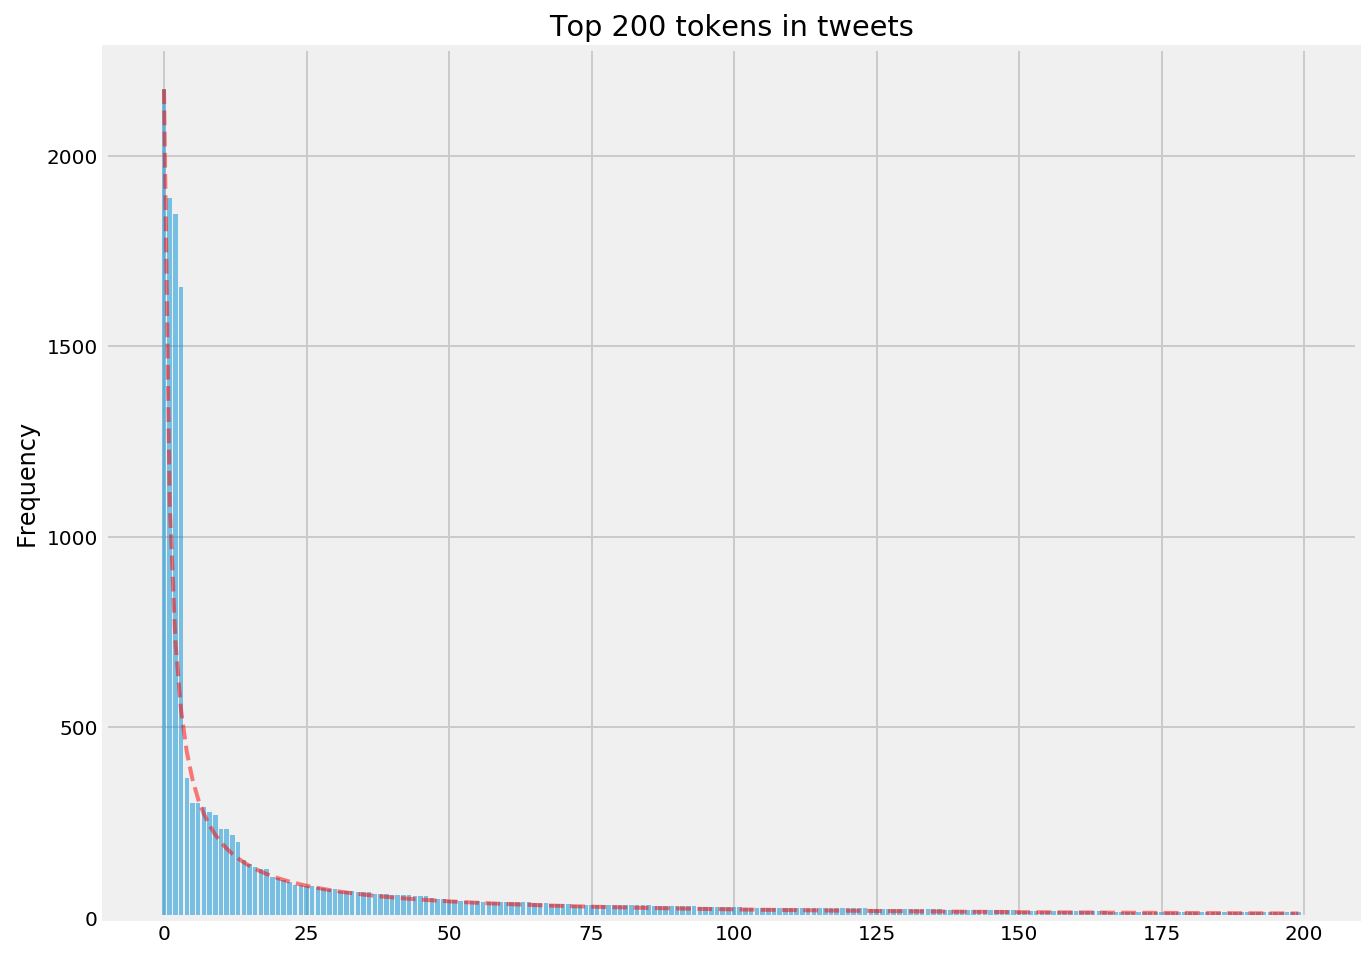

In [266]:
y_pos = np.arange(200)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df.sort_values(by='total', ascending=False)['total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:200], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 200 tokens in tweets')

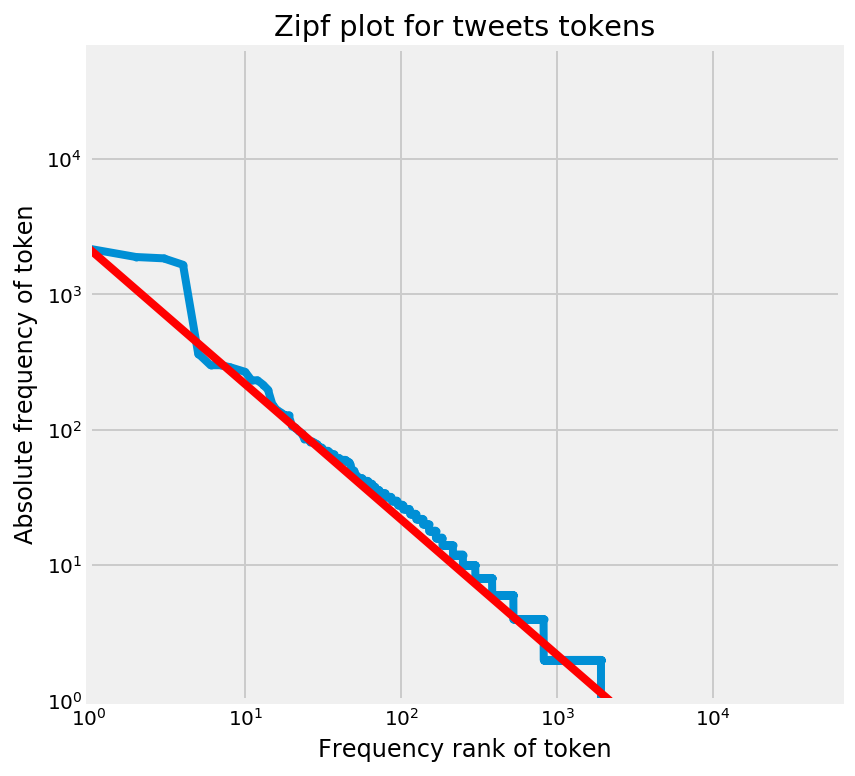

In [268]:
from pylab import *
counts = term_freq_df.total
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(6,6))
plt.ylim(1,2**16)
plt.xlim(1,2**16)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for tweets tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)

#for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
 #   dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
  #               verticalalignment="bottom",
   #              horizontalalignment="left")

In [198]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english')
cvec.fit(my_df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [186]:
%%time
neg_batches = np.linspace(0,3000,100).astype(int)
i=0
neg_tf = []
while i < len(neg_batches)-1:
    batch_result = np.sum(document_matrix[neg_batches[i]:neg_batches[i+1]].toarray(),axis=0)
    neg_tf.append(batch_result)
    if (i % 10 == 0) | (i == len(neg_batches)-2):
        print(neg_batches[i+1],"entries' term freuquency calculated")
    i += 1


30 entries' term freuquency calculated
333 entries' term freuquency calculated
636 entries' term freuquency calculated
939 entries' term freuquency calculated
1242 entries' term freuquency calculated
1545 entries' term freuquency calculated
1848 entries' term freuquency calculated
2151 entries' term freuquency calculated
2454 entries' term freuquency calculated
2757 entries' term freuquency calculated
3000 entries' term freuquency calculated
Wall time: 2.2 s


In [194]:
%%time
pos_batches = np.linspace(0,3000,100).astype(int)
i=0
pos_tf = []
while i < len(pos_batches)-1:
    batch_result = np.sum(document_matrix[pos_batches[i]:pos_batches[i+1]].toarray(),axis=0)
    print(len(batch_result))
    pos_tf.append(batch_result)
    if (i % 10 == 0) | (i == len(pos_batches)-2):
        print(pos_batches[i+1],"entries' term freuquency calculated")
    i += 1

24697
30 entries' term freuquency calculated
24697
24697
24697
24697
24697
24697
24697
24697
24697
24697
333 entries' term freuquency calculated
24697
24697
24697
24697
24697
24697
24697
24697
24697
24697
636 entries' term freuquency calculated
24697
24697
24697
24697
24697
24697
24697
24697
24697
24697
939 entries' term freuquency calculated
24697
24697
24697
24697
24697
24697
24697
24697
24697
24697
1242 entries' term freuquency calculated
24697
24697
24697
24697
24697
24697
24697
24697
24697
24697
1545 entries' term freuquency calculated
24697
24697
24697
24697
24697
24697
24697
24697
24697
24697
1848 entries' term freuquency calculated
24697
24697
24697
24697
24697
24697
24697
24697
24697
24697
2151 entries' term freuquency calculated
24697
24697
24697
24697
24697
24697
24697
24697
24697
24697
2454 entries' term freuquency calculated
24697
24697
24697
24697
24697
24697
24697
24697
24697
24697
2757 entries' term freuquency calculated
24697
24697
24697
24697
24697
24697
24697
24697
3

In [269]:
#cvec.transform(data_train['data']).todense()
neg = np.sum(neg_tf,axis=0)
pos = np.sum(pos_tf,axis=0)
#len(cvec.get_feature_names())
#len(neg_tf[0])
#term_freq_df2 = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
#term_freq_df2.columns = ['negative', 'positive']
#term_freq_df2['total'] = term_freq_df2['negative'] + term_freq_df2['positive']
#term_freq_df2.sort_values(by='total', ascending=False).iloc[:10]

In [201]:
!pip install nltk

In [286]:
import nltk
from nltk.stem import WordNetLemmatizer

from nltk.stem import PorterStemmer

ps=PorterStemmer() # racination 
print(ps.stem('He is playing a game'))

lemmatizer=WordNetLemmatizer()
nltk.download('wordnet')
print(lemmatizer.lemmatize('things'))


he is playing a gam
thing


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\smail\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
